K means Clustring Algorithms Implementation

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
from sklearn.datasets import make_blobs

In [9]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [10]:
X.shape

(1000, 2)

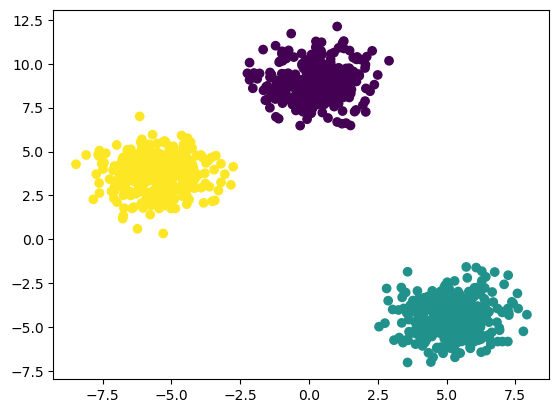

In [12]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.33, random_state=42
)

In [14]:
from sklearn.cluster import KMeans

## Manual process
## Elbow method to Select the K Value

In [15]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

d:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [16]:
wcss


[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1181.4952002962868,
 992.6846750155578,
 935.2765437461215,
 774.1344564767337,
 699.082115067309,
 627.5184818992437,
 544.8569241428479]

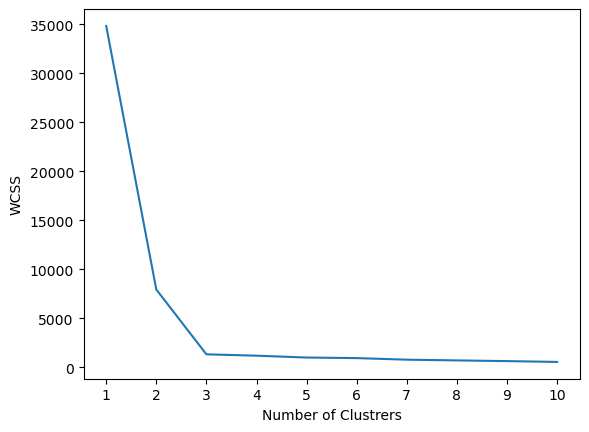

In [17]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [19]:
y_labels=kmeans.fit_predict(X_train)

d:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [30]:
y_test_label=kmeans.predict(X_train)

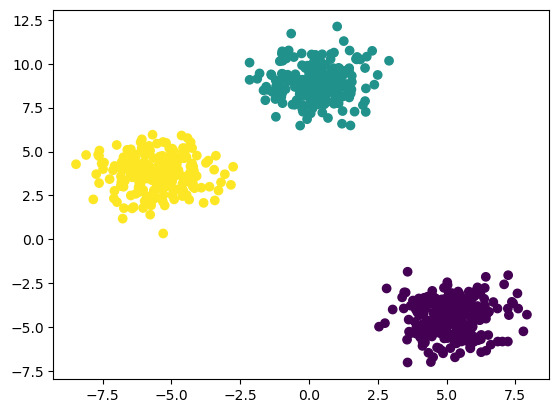

In [31]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)
plt.show()

In [32]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)
plt.show()

ValueError: 'c' argument has 670 elements, which is inconsistent with 'x' and 'y' with size 330.

In [ ]:
## knee locator
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

In [ ]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

In [ ]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()